# Littrow Spectrometer

In [1]:
from optiland import optic, analysis
import numpy as np

In [2]:
class LittrowSpectrometer(optic.Optic):
    """Spectrometer with transmission grating in Littrow configuration
    
    In the Littrow configuration, the incident and diffracted rays make equal
    angles with the grating normal, providing efficient coupling and compact design.
    """

    def __init__(self):
        super().__init__()
        
        # Grating parameters
        grating_period = 1.0  # microns
        grating_order = 1
        central_wavelength = 0.55  # microns
        grating_tilt = -np.arcsin(grating_order * central_wavelength / (2.0 * grating_period))
        
        # Lens parameters
        lens_radius = 100.0  # mm
        lens_thickness = 10.0  # mm
        lens_aperture = 40.0  # mm
        
        # System geometry
        object_to_lens1 = 93.619  # mm
        lens1_to_stop = 40.0  # mm
        stop_to_grating = 10.0  # mm
        grating_thickness = 2.0  # mm (substrate thickness)
        grating_to_lens2 = 50.0  # mm
        lens2_to_detector = 93.619  # mm
        
        # Build optical surfaces
        self.add_surface(index=0, radius=np.inf, z=0)
        
        # First lens (collimating)
        self.add_surface(
            index=1, 
            radius=lens_radius, 
            z=object_to_lens1, 
            material='N-BK7',
            aperture=lens_aperture
        )
        self.add_surface(
            index=2, 
            radius=-lens_radius, 
            z=object_to_lens1 + lens_thickness, 
            material='air',
            aperture=lens_aperture
        )
        
        # Aperture stop
        self.add_surface(
            index=3, 
            radius=np.inf, 
            z=object_to_lens1 + lens_thickness + lens1_to_stop, 
            material='air', 
            is_stop=True
        )
        
        # Transmission grating
        z_grating = object_to_lens1 + lens_thickness + lens1_to_stop + stop_to_grating
        self.add_surface(
            index=4, 
            radius=np.inf, 
            rx=grating_tilt,
            z=z_grating, 
            material='N-BK7',
            surface_type="grating", 
            grating_order=grating_order, 
            grating_period=grating_period, 
            groove_orientation_angle=0.0,
        )
        
        # Grating exit surface
        z_grating_exit = z_grating + grating_thickness * np.cos(grating_tilt)
        y_grating_exit = -grating_thickness * np.sin(grating_tilt)
        self.add_surface(
            index=5, 
            radius=np.inf, 
            z=z_grating_exit,
            y=y_grating_exit,
            rx=grating_tilt,
            material='air'
        )
        
        # Second lens (focusing) - first surface
        z_lens2_front = z_grating_exit + grating_to_lens2 * np.cos(2 * grating_tilt)
        y_lens2_front = y_grating_exit - grating_to_lens2 * np.sin(2 * grating_tilt)
        self.add_surface(
            index=6,
            radius=lens_radius, 
            z=z_lens2_front,
            y=y_lens2_front,
            rx=2 * grating_tilt,
            material='N-BK7'
        )
        
        # Second lens - second surface
        z_lens2_back = z_lens2_front + lens_thickness * np.cos(2 * grating_tilt)
        y_lens2_back = y_lens2_front - lens_thickness * np.sin(2 * grating_tilt)
        self.add_surface(
            index=7,
            radius=-lens_radius, 
            z=z_lens2_back,
            y=y_lens2_back,
            rx=2 * grating_tilt,
            material='air'
        )
        
        # Detector/image plane
        z_detector = z_lens2_back + lens2_to_detector * np.cos(2 * grating_tilt)
        y_detector = y_lens2_back - lens2_to_detector * np.sin(2 * grating_tilt)
        self.add_surface(
            index=8, 
            z=z_detector,
            y=y_detector,
            rx=2 * grating_tilt,
        )
        
        # Aperture
        self.set_aperture(aperture_type="float_by_stop_size", value=20)
        
        # Field points
        self.set_field_type(field_type="object_height")
        self.add_field(x=0, y=0)
        self.add_field(x=2, y=0)
        self.add_field(x=5, y=0)
        
        # Wavelengths
        self.add_wavelength(value=0.550, is_primary=True)
        self.add_wavelength(value=0.400)
        self.add_wavelength(value=0.700)

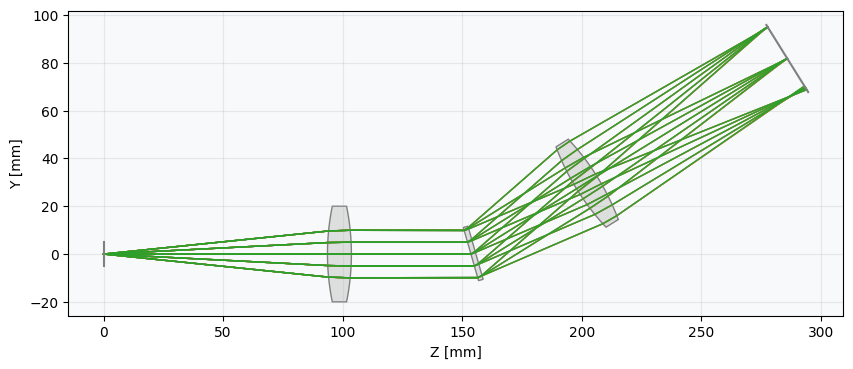

In [3]:
spectrometer = LittrowSpectrometer()
_ = spectrometer.draw(wavelengths = [0.400, 0.550, 0.700], num_rays=5)